# The Titanic Dataset

The task is create my very first machine learing algorithm to find out whether or not whether or not a person would have survived the Titanic, given its features. Details on the dataset:


1. survival - Survival (0 = No; 1 = Yes)
2. pclass - Ticket Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. name - Name
4. sex - Sex
5. age - Age in years
6. sibsp - Number of Siblings/Spouses Aboard
7. parch - Number of Parents/Children Aboard
8. ticket - Ticket Number
9. fare - Passenger Fare
10. cabin - Cabin
11. embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## Import required libraries

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import metrics

## Data Exploration


Read "titanic-train.csv" to do some data exploration

In [50]:
df = pd.read_csv('data/titanic_train.csv')

In [51]:
df.shape

(891, 12)

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [54]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [133]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(df, test_size=0.2)

### Remarks
"Cabin" column will not be interesting for us, because there is a lot of missing data.

"Age" column may be important for the model, and but some of decision tree models have a mechanism for estimating missing value based on correlation with other values if possible.

"Embarked" has only 2 null values hence we will just drop it for good.

In [56]:
df.drop('Cabin', axis=1, inplace=True)

In [57]:
df = df.dropna(subset=['Embarked'])

In [58]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [59]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [60]:
df.shape

(889, 11)

Find correlation of numerical features 

In [61]:
train_numeric = df.select_dtypes(include=['float64', 'int64'])

In [62]:
train_numeric.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


<AxesSubplot:title={'center':'Pearson correlation of numeric features'}>

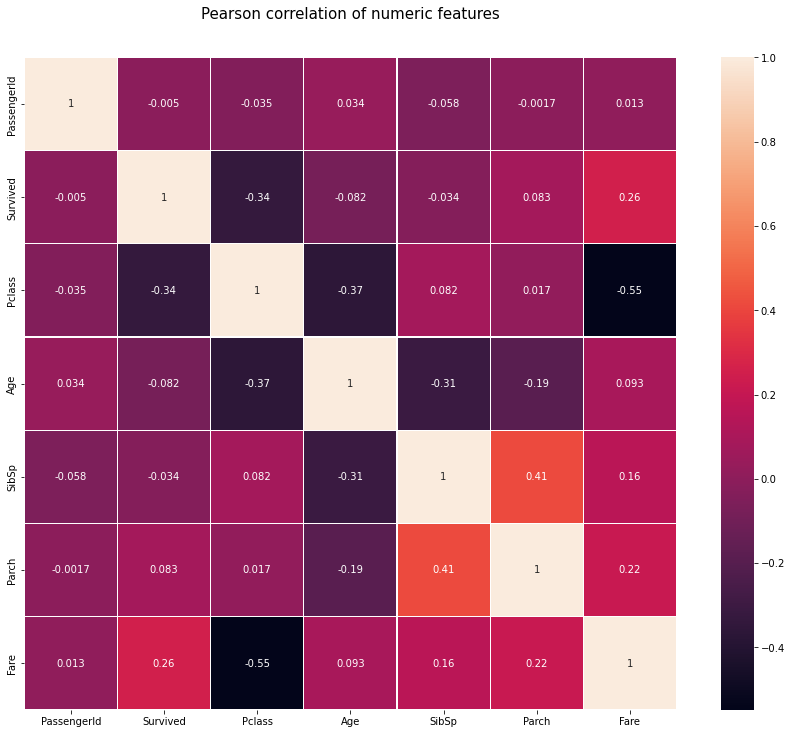

In [63]:
plt.figure(figsize=(16,12))

plt.title('Pearson correlation of numeric features', y=1.05, size=15)
sns.heatmap(train_numeric.corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

Two interesting correlations are:
- positive (0.41) for "SibSp" and "Parch"
- negative (-0.31) for "SibSp" and "Age"

Now let's have a look on categorical features

In [64]:
def survived_percent(categories,column):
    survived_list = []
    for c in categories:
        count = df[df[column] == c][column].count()
        survived = df[df[column] == c]["Survived"].sum()/count
        survived_list.append(survived)
    return survived_list    
   
category_features_list = ["Sex", "Embarked","Pclass"]
category_features = {}

for x in category_features_list:
    unique_values = df[x].unique()
    survived = survived_percent(unique_values,x)
    category_features[x] = [unique_values, survived]


In [65]:
category_features

{'Sex': [array(['male', 'female'], dtype=object),
  [0.18890814558058924, 0.7403846153846154]],
 'Embarked': [array(['S', 'C', 'Q'], dtype=object),
  [0.33695652173913043, 0.5535714285714286, 0.38961038961038963]],
 'Pclass': [array([3, 1, 2], dtype=int64),
  [0.24236252545824846, 0.6261682242990654, 0.47282608695652173]]}

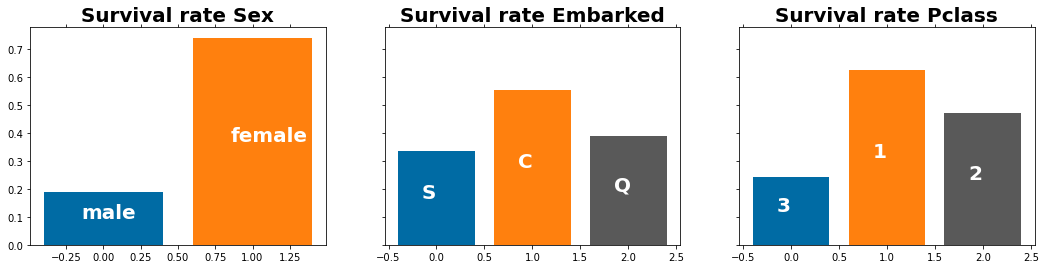

In [66]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=True)
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
cb_grey = (89/255, 89/255, 89/255)
color=[cb_dark_blue,cb_orange,cb_grey]

font_dict = {'fontsize':20, 
             'fontweight':'bold',
             'color':"white"}

for i,cat in enumerate(category_features.keys()):
    number_categories = len(category_features[cat][0])
    axs[i].bar(range(number_categories), category_features[cat][1], color=color[:number_categories])
    axs[i].set_title("Survival rate " + cat ,fontsize=20, fontweight='bold' )
    for j,indx in enumerate(category_features[cat][1]):
        label_text = category_features[cat][0][j]
        x = j
        y = indx
        axs[i].annotate(label_text, xy = (x-0.15 ,y/2), **font_dict )

for i in range(3):
    axs[i].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off') # labels along the bottom edge are off
    axs[i].patch.set_visible(False)

## Data Pre-processing


Fill Null value in Age

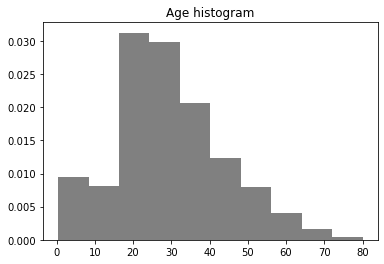

In [67]:
#Plot a histogram to see the distribution of age
fig, ax = plt.subplots( figsize=(6,4))
x = df["Age"].dropna()
hist, bins = np.histogram( x,bins=15)

ax.hist(x, density =True, color='grey')
ax.set_title('Age histogram')
plt.show()

In [68]:
from random import choices

bin_centers = 0.5*(bins[:len(bins)-1]+bins[1:])
probabilities = hist/hist.sum()
Age_null_list   = df[df["Age"].isnull()].index


In [69]:
Age_null_list

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [70]:
df["Age_rand"] = df["Age"].apply(lambda v: np.random.choice(bin_centers, p=probabilities))

In [71]:
df.loc[Age_null_list,"Age"] = df.loc[Age_null_list,"Age_rand"]
df.drop('Age_rand', axis=1, inplace=True)

In [72]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [73]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.294,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000,1,0,237736,30.0708,C


Now, we would like to handle categorical variable. 

Seems like PassengerID, Name and Ticket would not be useful here, unless we could use some NLP technique to identify the first name and the last name of the passanger and determine whether which last name or first name has the higher survival rate here. We will drop both column for our analysis. 

In [74]:
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)

Now, there are left with Sex and Embarked for encoding purpose. Also we cannot forget about Pclass as a categorical variable. This is because although the value is in integer, but based on our understanding, it is actually a class id to categorize people. Hence, we must include it for the encoding. 

In [75]:
from sklearn import preprocessing,tree
le = preprocessing.LabelEncoder()

In [76]:
categorical_column = ['Pclass', 'Sex', 'Embarked']

In [77]:
for i in categorical_column:
    df[i+'_encoded'] = le.fit_transform(df[i])

In [78]:
df.drop(categorical_column, axis=1,inplace=True)

In [79]:
df.head(10)

,Survived,Age,SibSp,Parch,Fare,Pclass_encoded,Sex_encoded,Embarked_encoded
0,0,22.000,1,0,7.2500,2,1,2
1,1,38.000,1,0,71.2833,0,0,0
2,1,26.000,0,0,7.9250,2,0,2
3,1,35.000,1,0,53.1000,0,0,2
4,0,35.000,0,0,8.0500,2,1,2
5,0,24.294,0,0,8.4583,2,1,1
6,0,54.000,0,0,51.8625,0,1,2
7,0,2.000,3,1,21.0750,2,1,2
8,1,27.000,0,2,11.1333,2,0,2
9,1,14.000,1,0,30.0708,1,0,0


After done the preprocessing, we can go for the training model

## Training Model (Decision Tree)

In [83]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

#finding best fit with gridsearch
param_grid = {'min_samples_leaf':np.arange(20,50,5),
              'min_samples_split':np.arange(20,50,5),
              'max_depth':np.arange(3,6),
              'min_weight_fraction_leaf':np.arange(0,0.4,0.1),
              'criterion':['gini','entropy']}


In [84]:
clf = tree.DecisionTreeClassifier()
tree_search = GridSearchCV(clf, param_grid, scoring='average_precision')


In [85]:
X = train.iloc[:,1:]
Y = train.iloc[:,0]


In [86]:
tree_search.fit(X,Y)

print("Tree best parameters :",tree_search.best_params_)
print("Tree best estimator :",tree_search.best_estimator_ )
print("Tree best score :",tree_search.best_score_ )

Tree best parameters : {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 40, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0}
Tree best estimator : DecisionTreeClassifier(max_depth=5, min_samples_leaf=40, min_samples_split=20)
Tree best score : 0.7877094040755583


In [87]:
tree_best_parameters = tree_search.best_params_
tree_optimized = tree.DecisionTreeClassifier(**tree_best_parameters)
tree_optimized.fit(X,Y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=40, min_samples_split=20)

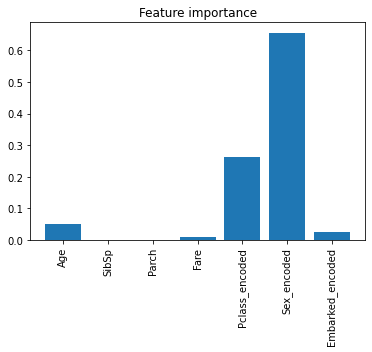

In [88]:
train_columns = list(train.columns)
fig, ax = plt.subplots( figsize=(6,4))
ax.bar(range(len(X.columns)),tree_optimized.feature_importances_ )
plt.xticks(range(len(X.columns)),X.columns,rotation=90)
ax.set_title("Feature importance")
plt.show()

## Prediction on the test set 

In [122]:
test = pd.read_csv('data/titanic_test.csv')

In [105]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [106]:
#Preprocessing for test data 
#Drap unrelated column
test_cleaned = test.copy()

test_cleaned.drop('Cabin', axis=1, inplace=True)
test_cleaned.dropna(subset=['Embarked'])
test_cleaned.dropna(subset=['Fare'])
test_cleaned.drop('PassengerId', axis=1, inplace=True)
test_cleaned.drop('Name', axis=1, inplace=True)
test_cleaned.drop('Ticket', axis=1, inplace=True)

In [111]:
test_cleaned.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [112]:
#Fill age with random number 
Age_null_list_test = test_cleaned[test_cleaned["Age"].isnull()].index

In [113]:
Age_null_list_test

Int64Index([ 10,  22,  29,  33,  36,  39,  41,  47,  54,  58,  65,  76,  83,
             84,  85,  88,  91,  93, 102, 107, 108, 111, 116, 121, 124, 127,
            132, 133, 146, 148, 151, 160, 163, 168, 170, 173, 183, 188, 191,
            199, 200, 205, 211, 216, 219, 225, 227, 233, 243, 244, 249, 255,
            256, 265, 266, 267, 268, 271, 273, 274, 282, 286, 288, 289, 290,
            292, 297, 301, 304, 312, 332, 339, 342, 344, 357, 358, 365, 366,
            380, 382, 384, 408, 410, 413, 416, 417],
           dtype='int64')

In [116]:
test_cleaned["Age_rand"] = test_cleaned["Age"].apply(lambda v: np.random.choice(bin_centers, p=probabilities))
test_cleaned.loc[Age_null_list_test,"Age"] = test_cleaned.loc[Age_null_list_test,"Age_rand"]
test_cleaned.drop('Age_rand', axis=1, inplace=True)

In [117]:
test_cleaned.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [119]:
test_cleaned.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [120]:
#encode category column 
for i in categorical_column:
    test_cleaned[i+'_encoded'] = le.fit_transform(test_cleaned[i])

In [123]:
test_cleaned.drop(categorical_column, axis=1,inplace=True)

In [125]:
test_cleaned.head()

,Age,SibSp,Parch,Fare,Pclass_encoded,Sex_encoded,Embarked_encoded
0,34.5,0,0,7.8292,2,1,1
1,47.0,1,0,7.0000,2,0,2
2,62.0,0,0,9.6875,1,1,1
3,27.0,0,0,8.6625,2,1,2
4,22.0,1,1,12.2875,2,0,2


In [126]:
prediction_values = tree_optimized.predict(test_cleaned).astype(int)

In [130]:
prediction = pd.DataFrame({"PassengerId": test["PassengerId"],
                          "Survived":prediction_values})

In [131]:
prediction

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## Performance Evaluation

In [136]:
from sklearn.metrics import confusion_matrix


In [146]:
prediction_values_random = np.random.choice(prediction_values, size=178)

In [138]:
valid_values = valid['Survived'].astype(int)

In [147]:
cf_matrix = confusion_matrix(valid_values, prediction_values_random)
print(cf_matrix)

[[80 29]
 [45 24]]
